In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from helpers import *

# New dataset problems:

### User names with less than 5k followers are encripted
This means that it will be hard to link these users to the authors of the old dataset, the **solution** could be to match the encripted users with their tweets and then look for identical tweets in between the two datasets, in this way we could trace back the names of the encripted users

###### Merging tweet contents and users from new dataset and saving it 

In [73]:
#just picking the tweetid and userid from the tweet stats dataset.
tweet_stats = pd.read_csv(access_folder('data') + 'rus_troll_tweet_stats.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.



In [74]:
tweet_stats = tweet_stats.set_index('tweetid')
tweet_stats.head()

,userid,tweet_time,in_reply_to_tweetid,in_reply_to_userid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
tweetid,,,,,,,,,,,,,,,,
877919995476496385,249064136b1c5cb00a705316ab73dd9b53785748ab757f...,2017-06-22 16:03,NaN,NaN,NaN,True,2572896396,8.779172e+17,0,0,0,0,[],[http://ru-open.livejournal.com/374284.html],[2572896396],NaN
492388766930444288,0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624...,2014-07-24 19:20,NaN,NaN,NaN,False,NaN,NaN,0,0,0,0,NaN,[http://pyypilg33.livejournal.com/11069.html],NaN,NaN
719455077589721089,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,2016-04-11 09:20,7.194399e+17,40807205,NaN,False,NaN,NaN,0,0,0,0,[],[https://www.youtube.com/watch?v=9GvpImWxTJc],[40807205],NaN
536179342423105537,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,2014-11-22 15:28,NaN,NaN,NaN,False,NaN,NaN,0,0,0,0,[STOPNazi],NaN,NaN,NaN
841410788409630720,a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...,2017-03-13 22:08,NaN,NaN,NaN,False,NaN,NaN,0,0,3,4,[],[https://goo.gl/fBp94X],NaN,NaN


In [75]:
#loading tweet content dataset 
tweet_text = pd.read_csv(access_folder('data') + 'rus_troll_tweet_text.csv')

In [76]:
tweet_text = tweet_text.set_index('tweetid')
tweet_text.head()

,tweet_language,tweet_text
tweetid,,
877919995476496385,ru,RT @ruopentwit: ⚡️У НАС НОВОЕ ВИДЕО! Американе...
492388766930444288,ru,Серебром отколоколило http://t.co/Jaa4v4IFpM
719455077589721089,bg,@kpru С-300 в Иране https://t.co/elnu3qLUW7
536179342423105537,ru,"Предлагаю судить их за поддержку нацизма, т.к...."
841410788409630720,bg,Предостережение американского дипломата https:...


In [77]:
#merging two datasets by tweetid
merged = tweet_text.join(tweet_stats)
merged.head()

,tweet_language,tweet_text,userid,tweet_time,in_reply_to_tweetid,in_reply_to_userid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
tweetid,,,,,,,,,,,,,,,,,,
877919995476496385,ru,RT @ruopentwit: ⚡️У НАС НОВОЕ ВИДЕО! Американе...,249064136b1c5cb00a705316ab73dd9b53785748ab757f...,2017-06-22 16:03,NaN,NaN,NaN,True,2572896396,8.779172e+17,0,0,0,0,[],[http://ru-open.livejournal.com/374284.html],[2572896396],NaN
492388766930444288,ru,Серебром отколоколило http://t.co/Jaa4v4IFpM,0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624...,2014-07-24 19:20,NaN,NaN,NaN,False,NaN,NaN,0,0,0,0,NaN,[http://pyypilg33.livejournal.com/11069.html],NaN,NaN
719455077589721089,bg,@kpru С-300 в Иране https://t.co/elnu3qLUW7,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,2016-04-11 09:20,7.194399e+17,40807205,NaN,False,NaN,NaN,0,0,0,0,[],[https://www.youtube.com/watch?v=9GvpImWxTJc],[40807205],NaN
536179342423105537,ru,"Предлагаю судить их за поддержку нацизма, т.к....",bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,2014-11-22 15:28,NaN,NaN,NaN,False,NaN,NaN,0,0,0,0,[STOPNazi],NaN,NaN,NaN
841410788409630720,bg,Предостережение американского дипломата https:...,a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...,2017-03-13 22:08,NaN,NaN,NaN,False,NaN,NaN,0,0,3,4,[],[https://goo.gl/fBp94X],NaN,NaN


In [78]:
merged = merged.reset_index()
merged.shape

(9041308, 19)

In [79]:
merged = merged[merged['tweet_language'] == 'en']
merged.shape

(3261931, 19)

In [80]:
def series_string_to_datetime (series):
    format_str = '%Y-%m-%d %H:%M' # The format
    return series.apply(lambda x: datetime.datetime.strptime(x, format_str))

merged['tweet_time'] = series_string_to_datetime(merged['tweet_time'])

In [81]:
merged = merged[merged['tweet_time'] <= datetime.date(2016,11,8)]
merged.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.



(2129332, 19)

In [82]:
meta_data = pd.read_csv(access_folder() + 'rus_troll_tweet_metadata.csv')
meta_data.head()

,tweetid,follower_count,following_count,latitude,longitude,tweet_client_name
0,849295393867399169,4042,1470,NaN,NaN,Twitter Web Client
1,567280957913587713,272,390,NaN,NaN,iziaslav
2,493095247690612736,89,223,NaN,NaN,vavilonX
3,493892174069903360,89,223,NaN,NaN,vavilonX
4,512503798506721280,89,223,NaN,NaN,vavilonX


In [83]:
merged = merged.set_index('tweetid').join(meta_data.set_index('tweetid')[['follower_count', 'following_count']], on='tweetid', how='inner')
merged.columns

Index(['tweet_language', 'tweet_text', 'userid', 'tweet_time',
       'in_reply_to_tweetid', 'in_reply_to_userid', 'quoted_tweet_tweetid',
       'is_retweet', 'retweet_userid', 'retweet_tweetid', 'quote_count',
       'reply_count', 'like_count', 'retweet_count', 'hashtags', 'urls',
       'user_mentions', 'poll_choices', 'follower_count', 'following_count'],
      dtype='object')

In [84]:
merged = merged.reset_index()

In [85]:
user_data = pd.read_csv(access_folder('data') + 'rus_troll_user.csv')
user_data.head()

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,account_creation_date,account_language,follower_count,following_count,last_tweet_at
0,004c1875a5f3a8ddfd2044b857a81c5d458882ac5cdf67...,004c1875a5f3a8ddfd2044b857a81c5d458882ac5cdf67...,004c1875a5f3a8ddfd2044b857a81c5d458882ac5cdf67...,New York,NaN,NaN,2014-05-23,en,63,77,2014-09-18 08:18
1,005b6c0f7e3371b1cacced2890fead3d5543694ab21372...,005b6c0f7e3371b1cacced2890fead3d5543694ab21372...,005b6c0f7e3371b1cacced2890fead3d5543694ab21372...,"New York, NY",NaN,NaN,2014-08-05,en,112,153,2015-11-27 00:57
2,005c20d3604f7b90f0d5b22f60226d60cfd9c7bdf5c728...,005c20d3604f7b90f0d5b22f60226d60cfd9c7bdf5c728...,005c20d3604f7b90f0d5b22f60226d60cfd9c7bdf5c728...,"Macon, GA",NaN,NaN,2016-04-14,en,64,825,2016-05-10 16:52
3,00b6194ca3359e2f37000037e20223ee91cfffcf15c7b9...,00b6194ca3359e2f37000037e20223ee91cfffcf15c7b9...,00b6194ca3359e2f37000037e20223ee91cfffcf15c7b9...,"Хабаровск, Россия",Непрост,NaN,2013-11-11,ru,181,255,2016-09-23 09:14
4,00bd49f19d4096b1f47e6e7702dddd746cf7021795f234...,00bd49f19d4096b1f47e6e7702dddd746cf7021795f234...,00bd49f19d4096b1f47e6e7702dddd746cf7021795f234...,United States,NaN,NaN,2014-05-15,en,71,81,2015-11-27 03:28


In [86]:
merged = merged.set_index('userid').join(user_data.set_index('userid')[['last_tweet_at']], on='userid', how='inner')
merged.head()

,tweetid,tweet_language,tweet_text,tweet_time,in_reply_to_tweetid,in_reply_to_userid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,...,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,follower_count,following_count,last_tweet_at
userid,,,,,,,,,,,,,,,,,,,,,
2b0d7525bed1df5119b7956f9be4888b45686172d68006a90634e87952eb45d3,567357519547207680,en,"As sun and cloud give way to moon and shadow, ...",2015-02-16 16:19:00,NaN,NaN,NaN,False,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,696,863,2016-01-17 17:50
2b0d7525bed1df5119b7956f9be4888b45686172d68006a90634e87952eb45d3,592350594255310849,en,The Brakfast Club #FattenAMovie http://t.co/7A...,2015-04-26 15:32:00,NaN,NaN,NaN,False,NaN,NaN,...,0,0,1,[FattenAMovie],[],NaN,NaN,696,863,2016-01-17 17:50
2b0d7525bed1df5119b7956f9be4888b45686172d68006a90634e87952eb45d3,563965952543322113,en,@the_hindu @Esha__Sharma Rly want to watch the...,2015-02-07 07:42:00,5.639580e+17,20751449,NaN,False,NaN,NaN,...,0,0,0,NaN,NaN,"[273384614, 20751449]",NaN,696,863,2016-01-17 17:50
2b0d7525bed1df5119b7956f9be4888b45686172d68006a90634e87952eb45d3,555644446184722432,en,Best notebook scenes http://t.co/EVQBLVDQyt,2015-01-15 08:35:00,NaN,NaN,NaN,False,NaN,NaN,...,0,1,0,NaN,[http://youtu.be/9eACebMOtv8],NaN,NaN,696,863,2016-01-17 17:50
2b0d7525bed1df5119b7956f9be4888b45686172d68006a90634e87952eb45d3,568756240345509888,en,The hardest part about growing up is letting g...,2015-02-20 12:57:00,NaN,NaN,NaN,False,NaN,NaN,...,0,0,0,[],[],NaN,NaN,696,863,2016-01-17 17:50


In [87]:
merged.reset_index(inplace=True)

In [88]:
merged.head()

,userid,tweetid,tweet_language,tweet_text,tweet_time,in_reply_to_tweetid,in_reply_to_userid,quoted_tweet_tweetid,is_retweet,retweet_userid,...,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,follower_count,following_count,last_tweet_at
0,2b0d7525bed1df5119b7956f9be4888b45686172d68006...,567357519547207680,en,"As sun and cloud give way to moon and shadow, ...",2015-02-16 16:19:00,NaN,NaN,NaN,False,NaN,...,0,0,0,NaN,NaN,NaN,NaN,696,863,2016-01-17 17:50
1,2b0d7525bed1df5119b7956f9be4888b45686172d68006...,592350594255310849,en,The Brakfast Club #FattenAMovie http://t.co/7A...,2015-04-26 15:32:00,NaN,NaN,NaN,False,NaN,...,0,0,1,[FattenAMovie],[],NaN,NaN,696,863,2016-01-17 17:50
2,2b0d7525bed1df5119b7956f9be4888b45686172d68006...,563965952543322113,en,@the_hindu @Esha__Sharma Rly want to watch the...,2015-02-07 07:42:00,5.639580e+17,20751449,NaN,False,NaN,...,0,0,0,NaN,NaN,"[273384614, 20751449]",NaN,696,863,2016-01-17 17:50
3,2b0d7525bed1df5119b7956f9be4888b45686172d68006...,555644446184722432,en,Best notebook scenes http://t.co/EVQBLVDQyt,2015-01-15 08:35:00,NaN,NaN,NaN,False,NaN,...,0,1,0,NaN,[http://youtu.be/9eACebMOtv8],NaN,NaN,696,863,2016-01-17 17:50
4,2b0d7525bed1df5119b7956f9be4888b45686172d68006...,568756240345509888,en,The hardest part about growing up is letting g...,2015-02-20 12:57:00,NaN,NaN,NaN,False,NaN,...,0,0,0,[],[],NaN,NaN,696,863,2016-01-17 17:50


In [89]:
merged.tweet_text = merged.tweet_text.astype(str)
merged = merged.drop('tweet_language', axis = 1)


In [90]:
merged.to_csv(access_folder('generated')+'merged_tweets.csv')

###### CAN START FROM HERE --- Loading all old dataset's tweets and merging with the just created dataset
now we must perform a merge between tweets (*good luck*)

In [110]:
#merged = pd.read_csv(access_folder('generated') + 'merged_tweets.csv')

tweets1 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_1.csv')
tweets2 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_2.csv')
tweets3 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_3.csv')
tweets4 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_4.csv')
tweets5 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_5.csv')
tweets6 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_6.csv')
tweets7 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_7.csv')
tweets8 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_8.csv')
tweets9 = pd.read_csv(access_folder('data') + 'IRAhandle_tweets_9.csv')

tweets = pd.concat([tweets1,tweets2,tweets3,tweets4,tweets5,tweets6,tweets7,tweets8,tweets9], axis=0)

In [111]:
tweets = tweets[['author', 'content', 'language', 'publish_date', 'following', 'followers', 'post_type', 'account_category']]
tweets.head()

,author,content,language,publish_date,following,followers,post_type,account_category
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",English,10/1/2017 19:58,1052,9636,NaN,RightTroll
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,English,10/1/2017 22:43,1054,9637,NaN,RightTroll
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,English,10/1/2017 22:50,1054,9637,RETWEET,RightTroll
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,English,10/1/2017 23:52,1062,9642,NaN,RightTroll
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",English,10/1/2017 2:13,1050,9645,RETWEET,RightTroll


In [112]:
def series_string_to_datetime (series):
    format_str = '%m/%d/%Y %H:%M' # The format
    return series.apply(lambda x: datetime.datetime.strptime(x, format_str))
print(tweets.shape)
tweets = tweets[tweets['language'] == 'English']
print(tweets.shape)
tweets['publish_date'] = series_string_to_datetime(tweets['publish_date'])

(2973371, 8)
(2128963, 8)


In [113]:
tweets = tweets[tweets['publish_date'] <= datetime.date(2016,11,8)]
tweets.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.



(1160773, 8)

In [114]:
tweets.rename(columns = {'content': 'tweet_text'}, inplace=True)
tweets = tweets.drop('language', axis = 1)
tweets.tweet_text = tweets.tweet_text.astype(str)
tweets.head()

,author,tweet_text,publish_date,following,followers,post_type,account_category
425,1D_NICOLE_,#FoodPoisoning is not a joke! #Walmart #KochFa...,2015-11-26 22:20:00,48,40,RETWEET,Fearmonger
426,1D_NICOLE_,Thanks God that #turkey i ate few days ago was...,2015-11-26 22:35:00,48,40,RETWEET,Fearmonger
428,1D_NICOLE_,"who's got the worst make up ever, don't tell m...",2015-05-25 12:38:00,59,51,NaN,Fearmonger
429,1D_NICOLE_,"I hurt easy, I just don't show it. You can hur...",2015-05-25 12:38:00,59,51,NaN,Fearmonger
430,1D_NICOLE_,« The young are permanently in a state resembl...,2015-05-25 12:39:00,59,51,NaN,Fearmonger


In [178]:
final = tweets.merge(merged, on='tweet_text', how='inner')

In [179]:
final.post_type = final.post_type.fillna('ORIGINAL')

In [180]:
final.post_type = final.post_type.astype('category')

In [181]:
final.post_type.cat.categories

Index(['ORIGINAL', 'QUOTE_TWEET', 'RETWEET'], dtype='object')

In [185]:
group = final[['tweet_text', 'post_type']].groupby(['tweet_text'])


In [240]:

original_tweets_percentages = []
RETWEET_tweets_percentages = []
QUOTE_tweets_percentages = []
nb_original = 0
nb_retweet = 0
nb_quote = 0
nb_duplicates = []
unique_original = 0
unique_retweet = 0
unique_quote = 0
for name, g in group:
    #original_tweets_percentages.append()
    value_counts = g.post_type.value_counts()
    if value_counts.sum() != 1:
        original_tweets_percentages.append(value_counts.ORIGINAL)
        RETWEET_tweets_percentages.append(value_counts.RETWEET)
        QUOTE_tweets_percentages.append(value_counts.QUOTE_TWEET)
        nb_duplicates.append(value_counts.sum())
    else:
        unique_original = unique_original + value_counts.ORIGINAL
        unique_retweet = unique_retweet + value_counts.RETWEET
        unique_quote = unique_quote + value_counts.QUOTE_TWEET
    nb_original = nb_original + value_counts.ORIGINAL
    nb_retweet = nb_retweet + value_counts.RETWEET
    nb_quote = nb_quote + value_counts.QUOTE_TWEET

In [210]:
_sum

1607136

In [214]:
nb_quote

6249

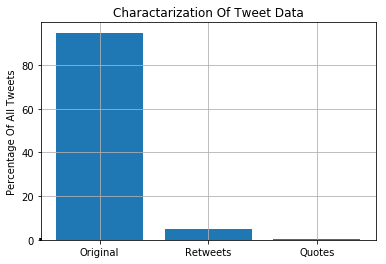

In [241]:
_sum = nb_original + nb_retweet + nb_quote
s = pd.Series([100*float(nb_original/_sum), 100*float(nb_retweet/_sum), 100* float(nb_quote/_sum)])

fig, ax = plt.subplots()
ind = np.arange(1, 4)
ax.set_xticks(ind)
ax.set_xticklabels(['Original', 'Retweets', 'Quotes'])
ax.set_title('Charactarization Of Tweet Data')
ax.set_ylabel('Percentage Of All Tweets')
ax.set_yticks(np.linspace(0,1,11),minor=True)
plt.bar(ind, [100*float(nb_original/_sum), 100*float(nb_retweet/_sum), 100* float(nb_quote/_sum)])
plt.grid()

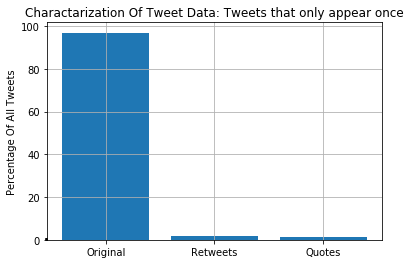

In [242]:
_sum = unique_original + unique_retweet + unique_quote
s = pd.Series([100*float(unique_original/_sum), 100*float(unique_retweet/_sum), 100* float(unique_quote/_sum)])

fig, ax = plt.subplots()
ind = np.arange(1, 4)
ax.set_xticks(ind)
ax.set_xticklabels(['Original', 'Retweets', 'Quotes'])
ax.set_title('Charactarization Of Tweet Data: Tweets that only appear once')
ax.set_ylabel('Percentage Of All Tweets')
ax.set_yticks(np.linspace(0,1,11),minor=True)
plt.bar(ind, [100*float(unique_original/_sum), 100*float(unique_retweet/_sum), 100* float(unique_quote/_sum)])
plt.grid()

In [248]:
data = {'Original':  original_tweets_percentages, 'Retweet': RETWEET_tweets_percentages, 'Quote' :QUOTE_tweets_percentages}
tweet_stats = pd.DataFrame(data= data, index=nb_duplicates)
sorted_stats = tweet_stats.groupby(tweet_stats.index).sum()

In [256]:
sorted_stats['Sum']  = sorted_stats.apply(lambda x: x[0] + x[1] + x[2], axis=1)
sorted_stats['Original'] = sorted_stats.apply(lambda x: float(x[0]/x[3]), axis=1)
sorted_stats['Retweet'] = sorted_stats.apply(lambda x: float(x[1]/x[3]), axis=1)
sorted_stats['Quote'] = sorted_stats.apply(lambda x: float(x[2]/x[3]), axis=1)
sorted_stats.head()

,Original,Retweet,Quote,Sum
2,0.629525,0.367134,0.003341,32928
3,0.393155,0.602530,0.004315,10197
4,0.902979,0.095524,0.001497,55452
5,0.233162,0.752479,0.014359,2925
6,0.589276,0.407168,0.003556,10686


In [267]:
def quantile(data):
    quantile = []
    for value in data:
        if value < 0.2:
            quantile.append('Below 20%')
        elif 0.4 >= value >= 0.2 :
            quantile.append('Between 20% to 40%')
        elif 0.6 >= value > 0.4 :
            quantile.append('Between 40% to 60%')
        elif 0.8 >= value > 0.6 :
            quantile.append('Between 60% to 80%')
        else:
            quantile.append('Above 80%')
    return quantile
sorted_stats['Original Q'] = quantile(sorted_stats['Original'])
sorted_stats['Retweet Q'] = quantile(sorted_stats['Retweet'])
sorted_stats['Quote Q'] = quantile(sorted_stats['Quote'])
sorted_stats['Original Q'] = sorted_stats['Original Q'].astype('category')
sorted_stats['Retweet Q'] = sorted_stats['Retweet Q'].astype('category')
sorted_stats['Quote Q'] = sorted_stats['Quote Q'].astype('category')

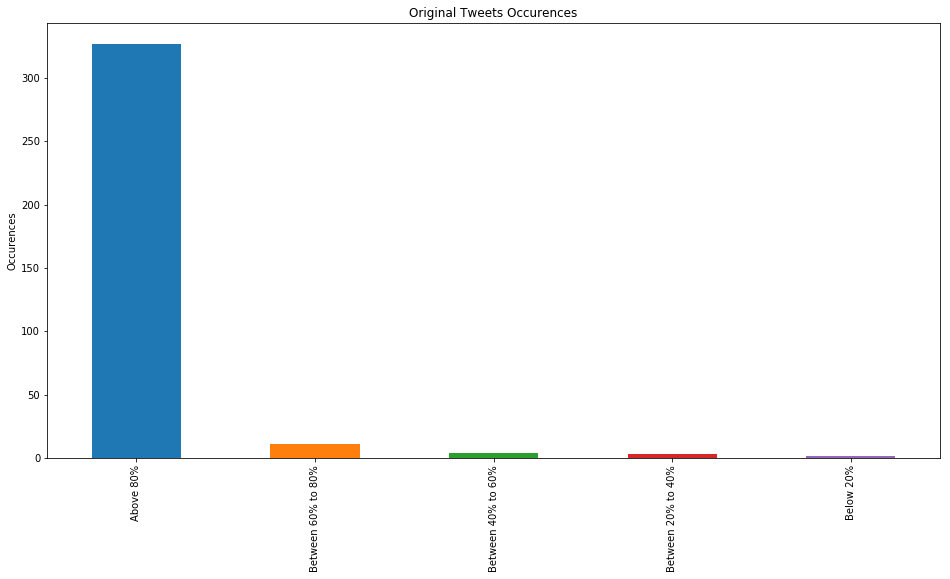

In [283]:
plot = sorted_stats['Original Q'].value_counts()
fig, ax = plt.subplots()
ax.set_title('Original Tweets Occurences')
ax.set_ylabel('Occurences')
plot.plot.bar(figsize=(16,8), ax=ax)

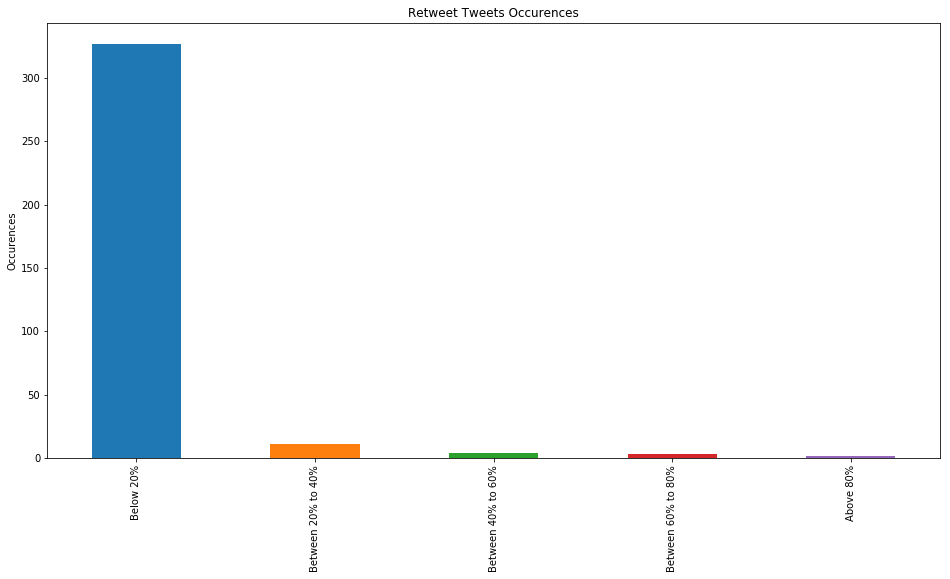

In [284]:
plot = sorted_stats['Retweet Q'].value_counts()
fig, ax = plt.subplots()
ax.set_title('Retweet Tweets Occurences')
ax.set_ylabel('Occurences')
plot.plot.bar(figsize=(16,8), ax=ax)

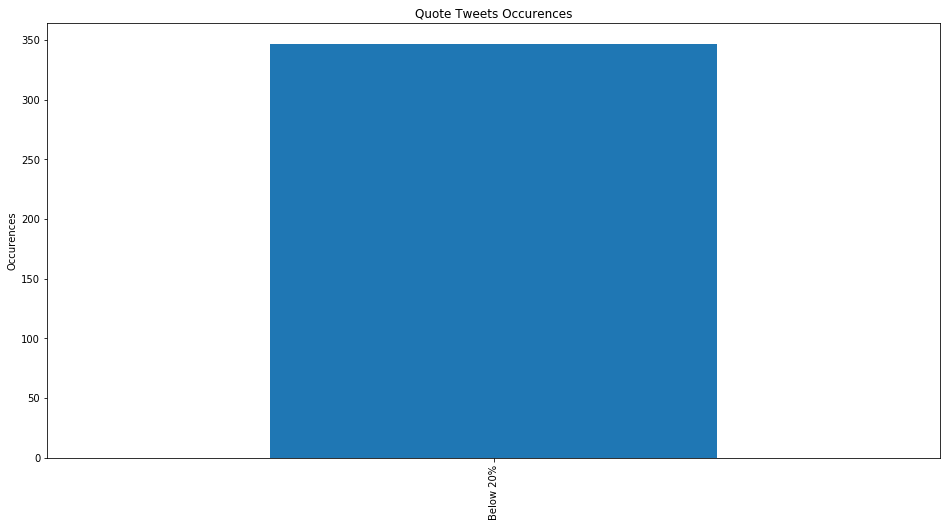

In [285]:
plot = sorted_stats['Quote Q'].value_counts()
fig, ax = plt.subplots()
ax.set_title('Quote Tweets Occurences')
ax.set_ylabel('Occurences')
plot.plot.bar(figsize=(16,8), ax=ax)

In [201]:
group.count().sort_values('post_type',ascending=False)

,post_type
tweet_text,
NewsOne Now Audio Podcast: Bishop E.W. Jackson Calls #BlackLivesMatter Is Movement “Disgraceful”,47740
Honor scores #sports,16900
Daily Celebrity Watch #celebs #news,15015
SE Wis. road construction projects #Wisconsin,13110
Celebrity style: Red carpet looks #celebs #news,11534
On the Air #sports,6545
Celebrity photos of the week #showbiz,3640
Winning numbers drawn in 'Triple Chance' game #Texas,2156
Forget about your house of cards,1914


In [140]:
text = final['tweet_text'].value_counts()

In [99]:
final.to_csv(access_folder('generated')+'final_merged_tweets.csv')